In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_text
from sklearn.tree import export_graphviz
import graphviz

In [2]:
data=pd.read_csv(r"C:/Users/praya/Desktop/Work/Prodigy Task 3/bank.csv")

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [6]:
data.shape

(11162, 17)

In [7]:
data.index

RangeIndex(start=0, stop=11162, step=1)

In [8]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [9]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [10]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [11]:
# Defining feature columns and target column 
features = ['age', 'job','education','marital', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']
target = 'deposit'

In [12]:
# One-hot encoding the categorical variables
data1 = pd.get_dummies(data, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'], drop_first=True)

In [13]:
# Splitting the data into training and testing sets
X = data1.drop(target, axis=1)
y = data1[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=30)
X_train

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
6976,46,596,20,138,3,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4301,49,523,3,152,2,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,False,True
7038,36,296,18,67,2,111,2,False,True,False,...,False,False,False,False,True,False,False,False,False,False
10214,35,951,19,220,2,-1,0,False,False,False,...,False,False,False,False,True,False,False,False,False,True
7318,49,230,30,176,1,-1,0,True,False,False,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,62,2,3,322,1,-1,0,False,False,True,...,False,False,False,False,True,False,False,False,False,True
919,58,3237,31,615,1,-1,0,False,False,False,...,False,False,False,False,False,True,False,False,False,True
500,32,454,18,978,1,-1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
4517,38,1478,12,926,4,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [14]:
X_train
X_test

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
2671,31,12569,9,344,1,295,1,False,False,False,...,False,False,False,False,False,False,True,False,False,False
734,33,1120,11,1070,2,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5855,37,586,11,141,2,-1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
8076,34,31,9,53,3,-1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2957,52,583,17,209,1,91,2,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4196,34,-374,11,672,1,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
7333,42,5774,15,54,2,-1,0,False,False,True,...,False,False,False,True,False,False,False,False,False,True
6843,36,0,28,8,13,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
827,60,1614,20,921,6,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [15]:
y_train

6976      no
4301     yes
7038      no
10214     no
7318      no
        ... 
4859     yes
919      yes
500      yes
4517     yes
5925      no
Name: deposit, Length: 5581, dtype: object

In [16]:
y_test

2671    yes
734     yes
5855     no
8076     no
2957    yes
       ... 
4196    yes
7333     no
6843     no
827     yes
5879     no
Name: deposit, Length: 5581, dtype: object

In [17]:
# Creating a Decision Tree Classifier
cl = DecisionTreeClassifier(random_state=30)

In [18]:
cl.fit(X_train, y_train)

DecisionTreeClassifier(random_state=30)

In [19]:
# Making the prediction
y_pred = cl.predict(X_test)

In [20]:
# Evaluating the model
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.7672460132592726


In [21]:
# Making a confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", matrix)

Confusion Matrix:
 [[2294  631]
 [ 668 1988]]


In [22]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

          no       0.77      0.78      0.78      2925
         yes       0.76      0.75      0.75      2656

    accuracy                           0.77      5581
   macro avg       0.77      0.77      0.77      5581
weighted avg       0.77      0.77      0.77      5581



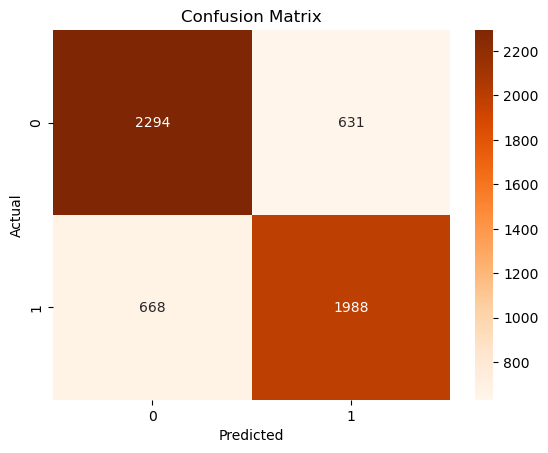

In [23]:
con = confusion_matrix(y_test, y_pred)
sns.heatmap(con, annot=True, fmt="d", cmap="Oranges")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [24]:
# Making a decision tree structure
tree_struct = export_text(cl, feature_names=list(X.columns))
print("Decision Tree Structure:")
print(tree_struct)

Decision Tree Structure:
|--- duration <= 351.50
|   |--- poutcome_success <= 0.50
|   |   |--- duration <= 139.50
|   |   |   |--- month_mar <= 0.50
|   |   |   |   |--- month_oct <= 0.50
|   |   |   |   |   |--- age <= 62.50
|   |   |   |   |   |   |--- age <= 25.50
|   |   |   |   |   |   |   |--- month_may <= 0.50
|   |   |   |   |   |   |   |   |--- housing_yes <= 0.50
|   |   |   |   |   |   |   |   |   |--- duration <= 109.50
|   |   |   |   |   |   |   |   |   |   |--- class: yes
|   |   |   |   |   |   |   |   |   |--- duration >  109.50
|   |   |   |   |   |   |   |   |   |   |--- balance <= 158.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: yes
|   |   |   |   |   |   |   |   |   |   |--- balance >  158.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: no
|   |   |   |   |   |   |   |   |--- housing_yes >  0.50
|   |   |   |   |   |   |   |   |   |--- class: no
|   |   |   |   |   |   |   |--- month_may >  0.50
|   |   |   |   |   |   |   |   |--- class: